# **This file performs below operations** -


***ER Modeling - timeframe (2019-2022)***
```
1.   Check for noisy readings.
2.   Imputing noisy readings with Linear Imputation
3.   Check for outliers with Z-score methodology
4.   Extreme level of outliers have been dropped and non-extreme outliers
     have been imputed with Linear imputation

```






In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
from os import walk
from time import sleep
from tqdm import tqdm
import pickle
import string
import numpy as np
import pandas as pd
from scipy import stats
from scipy import interpolate
import plotly.express as px
from plotly.offline import iplot
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [ ]:
gopi_base_path = '/content/drive/MyDrive/Colab Notebooks/DISC OU/DS for Ag - Alfalfa/Fall 2023'
Adam_base_path = '/content/drive/MyDrive/DSA Project'
raj_path = '/content/drive/MyDrive/DS for Ag - Alfalfa/Fall 2023'
base_path = gopi_base_path # just change this line
s1_data_path = os.path.join(base_path, 'Data','EVI and LSWI')
s2_data_path = os.path.join(base_path, 'Data','ER')

## Load the dataset for the 2nd objectives

In [ ]:
main_path = '/content/drive/MyDrive/DS for Ag - Alfalfa/Fall 2023'
data_path = os.path.join(main_path, 'Data')
code_path = os.path.join(main_path, 'Code')

In [ ]:
pickle_dir = os.path.join(data_path, 'pickle files')
# save the combined alfalfa data to a pickle file
pickle_dir = os.path.join(data_path, 'pickle files')
if os.path.exists(pickle_dir) == False:
  os.mkdir(pickle_dir)

In [ ]:
# Reading pickle file.
pickle_dir = os.path.join(data_path, 'pickle files')
file_name = 'p20_comp_df.pkl'
file_path = os.path.join(pickle_dir, file_name)
with open(file_path, 'rb') as fp:
    p20_final_df = pickle.load(fp)

print(p20_final_df.head())

                      Rg  Tair  Tsoil     rH     VPD  Ustar       SWC  \
Date                                                                    
2019-04-01 00:30:00  0.0  2.57   9.73  73.91 -9999.0   0.05  0.306482   
2019-04-01 01:00:00  0.0  2.56   9.39  73.33 -9999.0   0.03  0.306471   
2019-04-01 01:30:00  0.0  1.88   9.12  76.41 -9999.0   0.02  0.306262   
2019-04-01 02:00:00  0.0  1.78   8.83  74.55 -9999.0   0.03  0.306530   
2019-04-01 02:30:00  0.0  1.84   8.57  68.79 -9999.0   0.03  0.305710   

                         GPP   NEE        ET       ER  
Date                                                   
2019-04-01 00:30:00  0.55305  0.61  0.000358  1.16305  
2019-04-01 01:00:00  0.55226  0.29  0.000329  0.84226  
2019-04-01 01:30:00  0.49811  1.35  0.000964  1.84811  
2019-04-01 02:00:00  0.49012  0.63  0.000467  1.12012  
2019-04-01 02:30:00  0.49492  0.76  0.000832  1.25492  


In [ ]:
p20_final_df

,Rg,Tair,Tsoil,rH,VPD,Ustar,SWC,GPP,NEE,ET,ER
Date,,,,,,,,,,,
2019-04-01 00:30:00,0.00,2.57,9.73,73.91,-9999.00,0.05,0.306482,0.55305,0.61,0.000358,1.16305
2019-04-01 01:00:00,0.00,2.56,9.39,73.33,-9999.00,0.03,0.306471,0.55226,0.29,0.000329,0.84226
2019-04-01 01:30:00,0.00,1.88,9.12,76.41,-9999.00,0.02,0.306262,0.49811,1.35,0.000964,1.84811
2019-04-01 02:00:00,0.00,1.78,8.83,74.55,-9999.00,0.03,0.306530,0.49012,0.63,0.000467,1.12012
2019-04-01 02:30:00,0.00,1.84,8.57,68.79,-9999.00,0.03,0.305710,0.49492,0.76,0.000832,1.25492
...,...,...,...,...,...,...,...,...,...,...,...
2022-12-31 18:00:00,19.41,11.24,6.75,64.57,0.89,0.13,0.283907,0.00000,3.78,-0.002453,3.78000
2022-12-31 19:30:00,0.00,7.50,6.58,75.85,0.00,0.07,0.284217,0.00000,1.59,0.000767,1.59000
2022-12-31 20:30:00,0.00,7.97,6.41,71.28,1.41,0.10,0.284302,0.00000,1.69,0.001927,1.69000


In [ ]:
p20_final_df.isnull().sum()/len(p20_final_df)

Rg       0.000000
Tair     0.000000
Tsoil    0.000000
rH       0.000000
VPD      0.000000
Ustar    0.000000
SWC      0.050222
GPP      0.000000
NEE      0.000000
ET       0.000000
ER       0.000000
dtype: float64

In [ ]:
row_counts = (p20_final_df == -9999).sum(axis=1) # No. of rows that contain falsy readings i.e -9999

In [ ]:
row_counts

Date
2019-04-01 00:30:00    1
2019-04-01 01:00:00    1
2019-04-01 01:30:00    1
2019-04-01 02:00:00    1
2019-04-01 02:30:00    1
                      ..
2022-12-31 18:00:00    0
2022-12-31 19:30:00    0
2022-12-31 20:30:00    0
2022-12-31 22:00:00    0
2022-12-31 23:00:00    0
Length: 30166, dtype: int64

In [ ]:
# If in a single row, two or more than two columns contain the values equal to -9999, delete the rows accordingly
p20_final_df_filtered = p20_final_df[row_counts < 2]

In [ ]:
p20_final_df_filtered

,Rg,Tair,Tsoil,rH,VPD,Ustar,SWC,GPP,NEE,ET,ER
Date,,,,,,,,,,,
2019-04-01 00:30:00,0.00,2.57,9.73,73.91,-9999.00,0.05,0.306482,0.55305,0.61,0.000358,1.16305
2019-04-01 01:00:00,0.00,2.56,9.39,73.33,-9999.00,0.03,0.306471,0.55226,0.29,0.000329,0.84226
2019-04-01 01:30:00,0.00,1.88,9.12,76.41,-9999.00,0.02,0.306262,0.49811,1.35,0.000964,1.84811
2019-04-01 02:00:00,0.00,1.78,8.83,74.55,-9999.00,0.03,0.306530,0.49012,0.63,0.000467,1.12012
2019-04-01 02:30:00,0.00,1.84,8.57,68.79,-9999.00,0.03,0.305710,0.49492,0.76,0.000832,1.25492
...,...,...,...,...,...,...,...,...,...,...,...
2022-12-31 18:00:00,19.41,11.24,6.75,64.57,0.89,0.13,0.283907,0.00000,3.78,-0.002453,3.78000
2022-12-31 19:30:00,0.00,7.50,6.58,75.85,0.00,0.07,0.284217,0.00000,1.59,0.000767,1.59000
2022-12-31 20:30:00,0.00,7.97,6.41,71.28,1.41,0.10,0.284302,0.00000,1.69,0.001927,1.69000


In [ ]:
p20_final_df_filtered.isnull().sum()/len(p20_final_df_filtered)

Rg       0.00000
Tair     0.00000
Tsoil    0.00000
rH       0.00000
VPD      0.00000
Ustar    0.00000
SWC      0.04307
GPP      0.00000
NEE      0.00000
ET       0.00000
ER       0.00000
dtype: float64

In [ ]:
if (p20_final_df_filtered['Rg'] == -9999).any():
    print("Column 'Rg' contains at least one -9999 value.")
else:
    print("Column 'Rg' does not contain any -9999 values.")

Column 'Rg' does not contain any -9999 values.


In [ ]:
#p20_final_df_filtered.to_csv('p20_final_df_filtered.csv')

In [ ]:
p20_final_df_filtered.iloc[:,:10]

,Rg,Tair,Tsoil,rH,VPD,Ustar,SWC,GPP,NEE,ET
Date,,,,,,,,,,
2019-04-01 00:30:00,0.00,2.57,9.73,73.91,-9999.00,0.05,0.306482,0.55305,0.61,0.000358
2019-04-01 01:00:00,0.00,2.56,9.39,73.33,-9999.00,0.03,0.306471,0.55226,0.29,0.000329
2019-04-01 01:30:00,0.00,1.88,9.12,76.41,-9999.00,0.02,0.306262,0.49811,1.35,0.000964
2019-04-01 02:00:00,0.00,1.78,8.83,74.55,-9999.00,0.03,0.306530,0.49012,0.63,0.000467
2019-04-01 02:30:00,0.00,1.84,8.57,68.79,-9999.00,0.03,0.305710,0.49492,0.76,0.000832
...,...,...,...,...,...,...,...,...,...,...
2022-12-31 18:00:00,19.41,11.24,6.75,64.57,0.89,0.13,0.283907,0.00000,3.78,-0.002453
2022-12-31 19:30:00,0.00,7.50,6.58,75.85,0.00,0.07,0.284217,0.00000,1.59,0.000767
2022-12-31 20:30:00,0.00,7.97,6.41,71.28,1.41,0.10,0.284302,0.00000,1.69,0.001927


## Checking for Noisy Readings

In [ ]:
p20_final_df_ind = p20_final_df_filtered.iloc[:,:10]

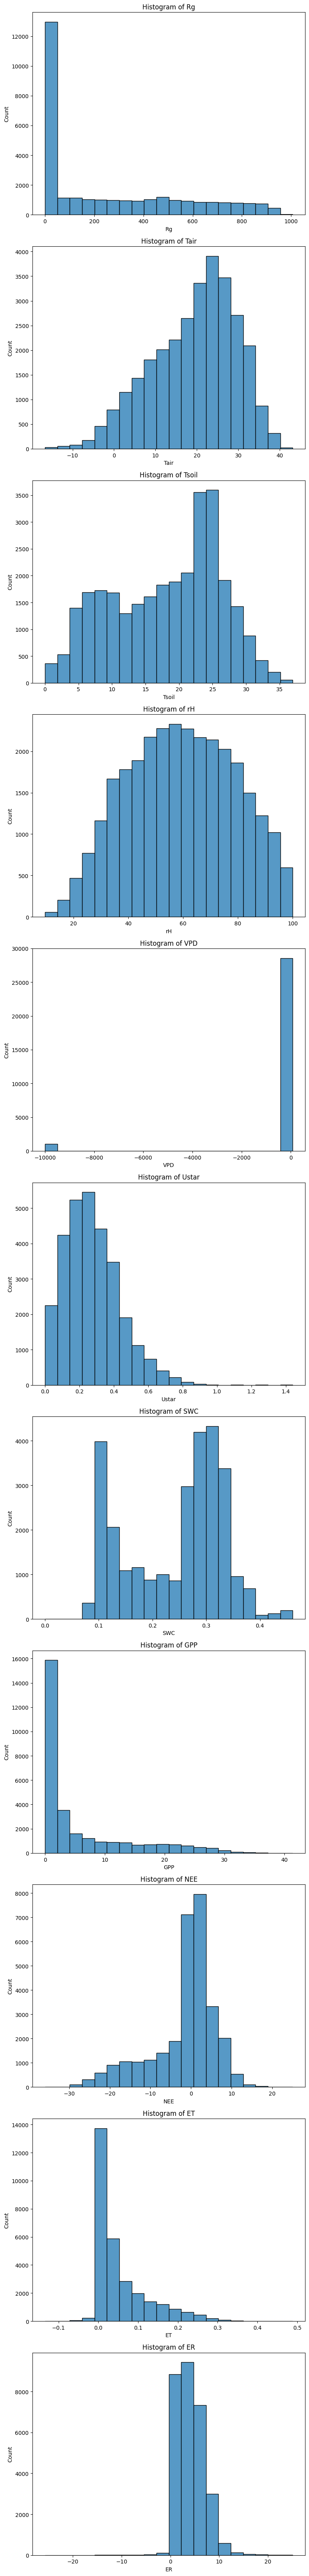

In [ ]:
columns = p20_final_df_filtered.columns

# Set up subplots to display histograms for each column
fig, axes = plt.subplots(nrows=len(columns), ncols=1, figsize=(8, 6*len(columns)))

# Loop through each column and create a histogram
for i, column in enumerate(columns):
    ax = axes[i]
    sns.histplot(data=p20_final_df_filtered, x=column, ax=ax, bins=20)  # You can adjust the number of bins as needed
    ax.set_title(f'Histogram of {column}')

# Adjust layout and show the plots
plt.tight_layout()
plt.show()

In [ ]:
p20_final_df_filtered['SWC'] = p20_final_df_filtered['SWC'].interpolate(method='linear')

In [ ]:
p20_final_df_filtered.isnull().sum()/len(p20_final_df_filtered)

Rg       0.0
Tair     0.0
Tsoil    0.0
rH       0.0
VPD      0.0
Ustar    0.0
SWC      0.0
GPP      0.0
NEE      0.0
ET       0.0
ER       0.0
dtype: float64

In [ ]:
# Replace -9999 with NaN for proper interpolation
p20_final_df_filtered['VPD'] = p20_final_df_filtered['VPD'].replace(-9999, np.nan)

# Linearly interpolate missing values in 'your_column'
p20_final_df_filtered['VPD'] = p20_final_df_filtered['VPD'].interpolate(method='linear',limit_direction='both')

In [ ]:
p20_final_df_filtered

,Rg,Tair,Tsoil,rH,VPD,Ustar,SWC,GPP,NEE,ET,ER
Date,,,,,,,,,,,
2019-04-01 00:30:00,0.00,2.57,9.73,73.91,0.09,0.05,0.306482,0.55305,0.61,0.000358,1.16305
2019-04-01 01:00:00,0.00,2.56,9.39,73.33,0.09,0.03,0.306471,0.55226,0.29,0.000329,0.84226
2019-04-01 01:30:00,0.00,1.88,9.12,76.41,0.09,0.02,0.306262,0.49811,1.35,0.000964,1.84811
2019-04-01 02:00:00,0.00,1.78,8.83,74.55,0.09,0.03,0.306530,0.49012,0.63,0.000467,1.12012
2019-04-01 02:30:00,0.00,1.84,8.57,68.79,0.09,0.03,0.305710,0.49492,0.76,0.000832,1.25492
...,...,...,...,...,...,...,...,...,...,...,...
2022-12-31 18:00:00,19.41,11.24,6.75,64.57,0.89,0.13,0.283907,0.00000,3.78,-0.002453,3.78000
2022-12-31 19:30:00,0.00,7.50,6.58,75.85,0.00,0.07,0.284217,0.00000,1.59,0.000767,1.59000
2022-12-31 20:30:00,0.00,7.97,6.41,71.28,1.41,0.10,0.284302,0.00000,1.69,0.001927,1.69000


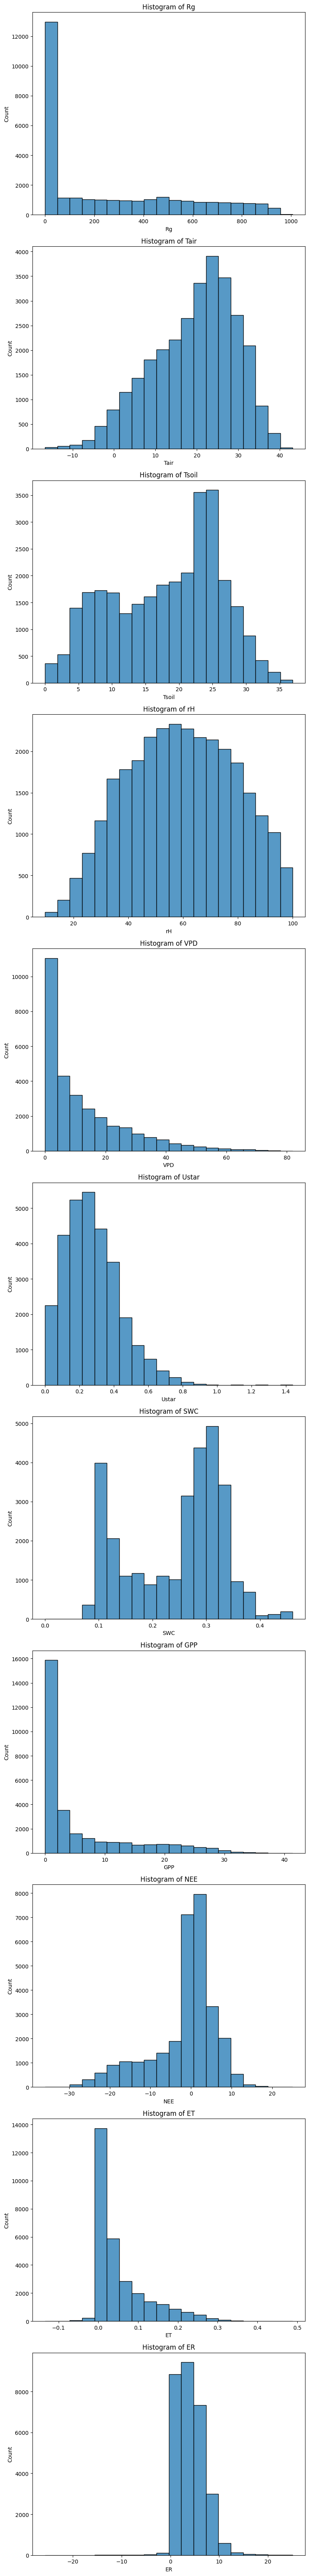

In [ ]:
columns = p20_final_df_filtered.columns

# Set up subplots to display histograms for each column
fig, axes = plt.subplots(nrows=len(columns), ncols=1, figsize=(8, 6*len(columns)))

# Loop through each column and create a histogram
for i, column in enumerate(columns):
    ax = axes[i]
    sns.histplot(data=p20_final_df_filtered, x=column, ax=ax, bins=20)  # You can adjust the number of bins as needed
    ax.set_title(f'Histogram of {column}')

# Adjust layout and show the plots
plt.tight_layout()
plt.show()

In [ ]:
# Define a threshold for identifying outliers (e.g., Z-score > 3 or < -3)
threshold = 3

# Function to detect and print outlier indices for each column using Z-scores
def detect_outliers_zscore(df, threshold):
    outlier_indices = {}
    for column in df.columns:
        z_scores = np.abs((df[column] - df[column].mean()) / df[column].std())
        column_outlier_indices = df.index[z_scores > threshold]  # Get datetime index where Z-scores exceed threshold
        outlier_indices[column] = list(column_outlier_indices)
        if column_outlier_indices.size > 0:
            print(f"Outlier Indices for Column '{column}':")
            print(column_outlier_indices)
    return outlier_indices

outlier_indices = detect_outliers_zscore(p20_final_df_filtered, threshold)

Outlier Indices for Column 'Tair':
DatetimeIndex(['2021-12-19 07:30:00', '2022-01-02 08:00:00',
               '2022-01-02 08:30:00', '2022-01-02 09:00:00',
               '2022-01-06 08:30:00', '2022-01-06 09:00:00',
               '2022-01-06 22:00:00', '2022-01-06 22:30:00',
               '2022-01-06 23:00:00', '2022-01-07 00:00:00',
               '2022-01-07 00:30:00', '2022-01-07 01:30:00',
               '2022-01-07 02:00:00', '2022-01-07 04:00:00',
               '2022-01-07 05:30:00', '2022-01-07 06:00:00',
               '2022-01-07 07:30:00', '2022-01-07 08:30:00',
               '2022-01-20 20:30:00', '2022-02-23 09:30:00',
               '2022-02-23 10:00:00', '2022-02-23 10:30:00',
               '2022-02-23 11:00:00', '2022-02-23 12:00:00',
               '2022-02-23 12:30:00', '2022-02-23 13:00:00',
               '2022-02-23 13:30:00', '2022-12-22 15:00:00',
               '2022-12-22 15:30:00', '2022-12-22 16:00:00',
               '2022-12-22 16:30:00', '2022-12-22 

In [ ]:
p20_final_df_index = p20_final_df_filtered.iloc[:,:10]

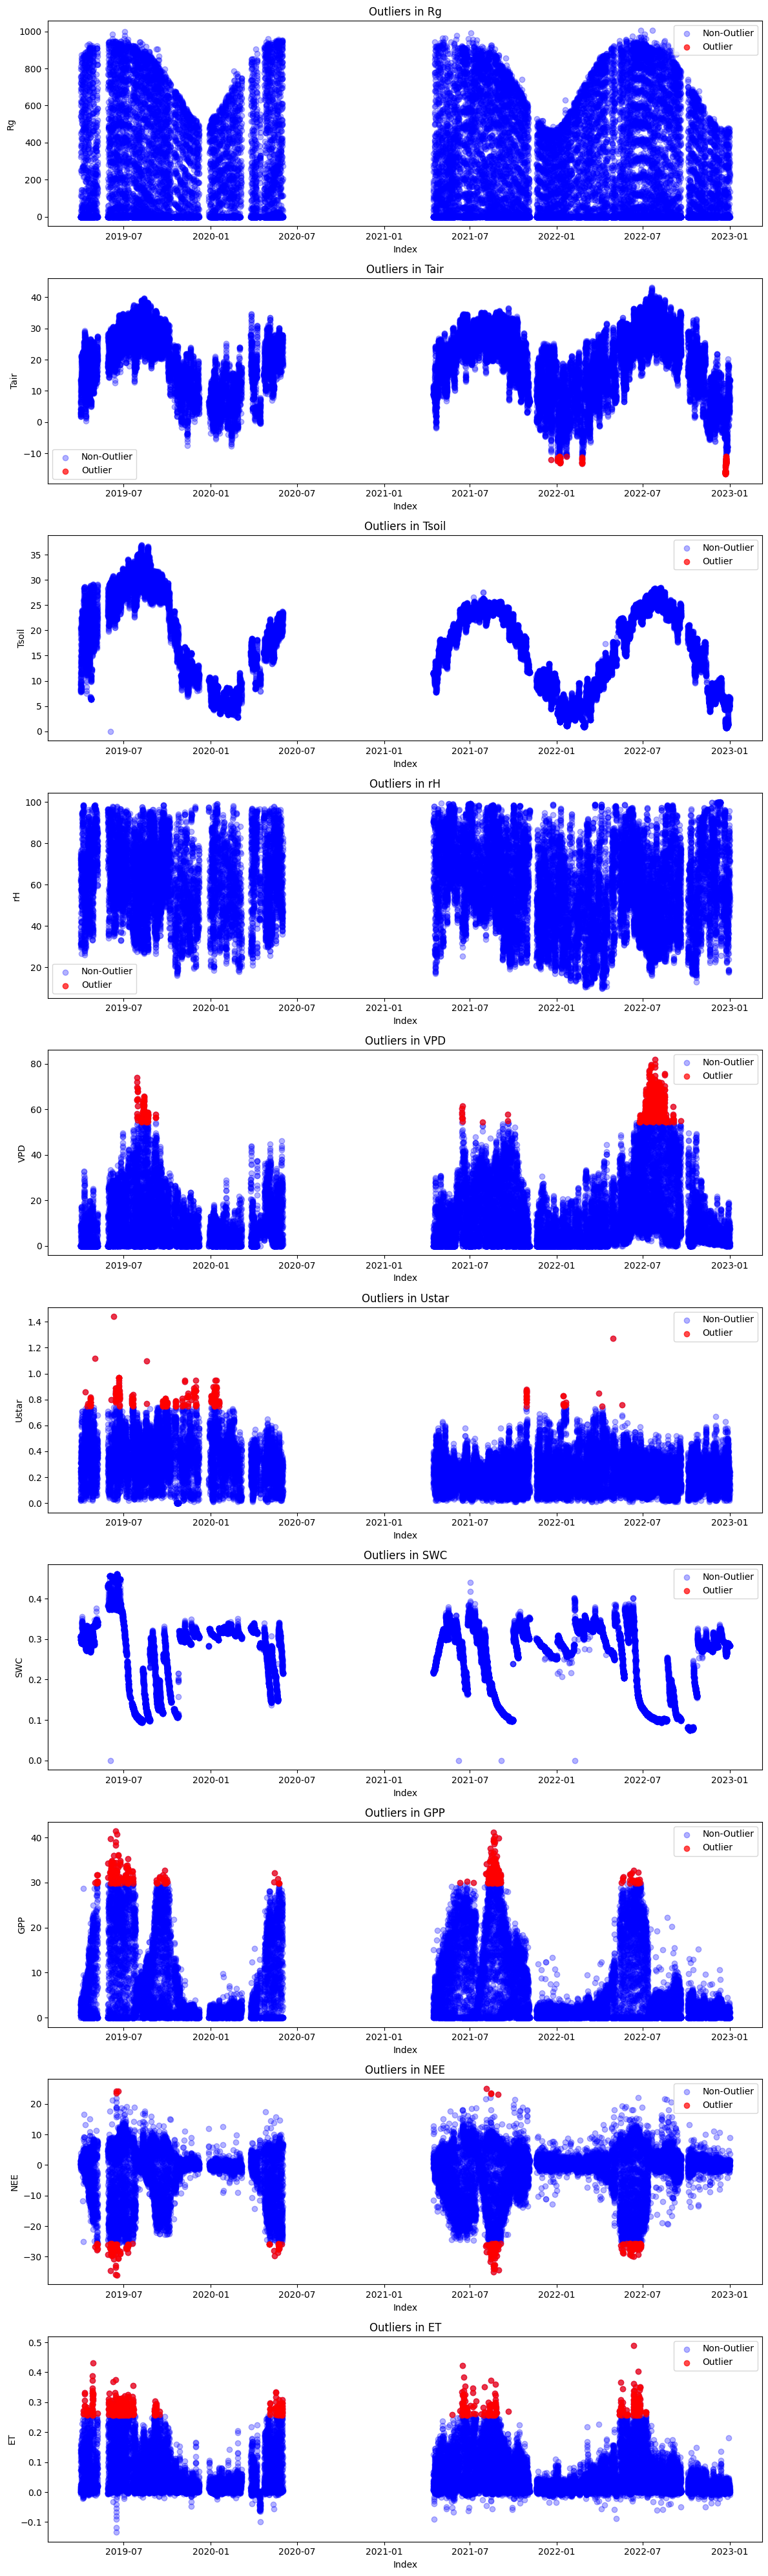

In [ ]:
# Function to visualize outliers for all columns using the Z-score method
def visualize_outliers_zscore(df, threshold):
    columns = df.columns
    num_columns = len(columns)

    # Define the figure size based on the number of columns
    fig, axes = plt.subplots(num_columns, 1, figsize=(12, 4*num_columns))

    for i, column in enumerate(columns):
        ax = axes[i]

        # Calculate Z-scores for the column
        z_scores = np.abs((df[column] - df[column].mean()) / df[column].std())

        # Plot data points and mark outliers
        ax.scatter(df.index, df[column], c='b', marker='o', label='Non-Outlier', alpha=0.3)
        ax.scatter(df.index[z_scores > threshold], df[column][z_scores > threshold], c='r', marker='o', label='Outlier', alpha=0.7)

        ax.set_xlabel("Index")
        ax.set_ylabel(column)
        ax.set_title(f"Outliers in {column}")

        # Create a legend for the scatter plot
        ax.legend(loc='best')

    plt.tight_layout()
    plt.show()

# Visualize outliers for all columns using the Z-score method
visualize_outliers_zscore(p20_final_df_index, threshold)

In [ ]:
# Function to impute outliers with linear interpolation using the Z-score method
def impute_outliers_zscore(df, threshold):
    for column in df.columns:
        # Calculate Z-scores for the column
        z_scores = np.abs((df[column] - df[column].mean()) / df[column].std())

        # Identify outlier indices based on the Z-score threshold
        outlier_indices = z_scores > threshold

        # Replace outlier values with NaN
        df[column][outlier_indices] = np.nan

        # Use linear interpolation to fill in missing values (NaN)
        df[column].interpolate(method='linear', inplace=True)

    return df


# Impute outliers with linear interpolation using the Z-score method
p20_final_df_ind_imputed_z_score = impute_outliers_zscore(p20_final_df_index, threshold)

In [ ]:
p20_final_df_ind_imputed_z_score

,Rg,Tair,Tsoil,rH,VPD,Ustar,SWC,GPP,NEE,ET
Date,,,,,,,,,,
2019-04-01 09:30:00,167.30,4.44,8.13,55.39,0.00,0.22,0.3046,1.1717,2.6661,0.0461
2019-04-01 10:00:00,326.45,5.76,8.61,52.64,0.00,0.30,0.3047,1.9635,1.1027,0.0753
2019-04-01 10:30:00,322.60,6.39,9.32,54.13,0.09,0.27,0.3055,2.7028,0.0300,0.0728
2019-04-01 11:00:00,381.79,7.04,9.95,46.14,0.57,0.31,0.3060,3.2724,-0.4900,0.0737
2019-04-01 11:30:00,543.03,8.23,10.66,41.87,2.33,0.31,0.3059,3.1724,-0.3000,0.1012
...,...,...,...,...,...,...,...,...,...,...
2022-12-31 21:00:00,0.00,8.28,6.31,67.95,0.88,0.16,0.2841,0.0001,2.0837,0.0056
2022-12-31 21:30:00,0.00,7.42,6.25,74.29,0.32,0.12,0.2839,0.0000,0.8865,0.0083
2022-12-31 22:00:00,0.00,6.96,6.15,71.48,1.37,0.10,0.2833,0.0000,1.3600,0.0008


In [ ]:
p20_final_df

,Rg,Tair,Tsoil,rH,VPD,Ustar,SWC,GPP,NEE,ET,ER
Date,,,,,,,,,,,
2019-04-01 09:30:00,167.30,4.44,8.13,55.39,0.00,0.22,0.3046,1.1717,2.6661,0.0461,3.8379
2019-04-01 10:00:00,326.45,5.76,8.61,52.64,0.00,0.30,0.3047,1.9635,1.1027,0.0753,3.0662
2019-04-01 10:30:00,322.60,6.39,9.32,54.13,0.09,0.27,0.3055,2.7028,0.0300,0.0728,2.7328
2019-04-01 11:00:00,381.79,7.04,9.95,46.14,0.57,0.31,0.3060,3.2724,-0.4900,0.0737,2.7824
2019-04-01 11:30:00,543.03,8.23,10.66,41.87,2.33,0.31,0.3059,3.1724,-0.3000,0.1012,2.8724
...,...,...,...,...,...,...,...,...,...,...,...
2022-12-31 21:00:00,0.00,8.28,6.31,67.95,0.88,0.16,0.2841,0.0001,2.0837,0.0056,2.0838
2022-12-31 21:30:00,0.00,7.42,6.25,74.29,0.32,0.12,0.2839,0.0000,0.8865,0.0083,0.8865
2022-12-31 22:00:00,0.00,6.96,6.15,71.48,1.37,0.10,0.2833,0.0000,1.3600,0.0008,1.3600


In [ ]:
p20_final_df_ind_imputed_z_score['ER'] = p20_final_df['ER']

In [ ]:
p20_final_df_ind_imputed_z_score


,Rg,Tair,Tsoil,rH,VPD,Ustar,SWC,GPP,NEE,ET,ER
Date,,,,,,,,,,,
2019-04-01 09:30:00,167.30,4.44,8.13,55.39,0.00,0.22,0.3046,1.1717,2.6661,0.0461,3.8379
2019-04-01 10:00:00,326.45,5.76,8.61,52.64,0.00,0.30,0.3047,1.9635,1.1027,0.0753,3.0662
2019-04-01 10:30:00,322.60,6.39,9.32,54.13,0.09,0.27,0.3055,2.7028,0.0300,0.0728,2.7328
2019-04-01 11:00:00,381.79,7.04,9.95,46.14,0.57,0.31,0.3060,3.2724,-0.4900,0.0737,2.7824
2019-04-01 11:30:00,543.03,8.23,10.66,41.87,2.33,0.31,0.3059,3.1724,-0.3000,0.1012,2.8724
...,...,...,...,...,...,...,...,...,...,...,...
2022-12-31 21:00:00,0.00,8.28,6.31,67.95,0.88,0.16,0.2841,0.0001,2.0837,0.0056,2.0838
2022-12-31 21:30:00,0.00,7.42,6.25,74.29,0.32,0.12,0.2839,0.0000,0.8865,0.0083,0.8865
2022-12-31 22:00:00,0.00,6.96,6.15,71.48,1.37,0.10,0.2833,0.0000,1.3600,0.0008,1.3600


In [ ]:
p20_final_df_ind_imputed = p20_final_df_ind_imputed_z_score.copy()

In [ ]:
#p20_final_df_ind_imputed.to_pickle('p20_final_df_index_imputed.pkl')

In [ ]:
file_name = 'p20_final_df_filtered.pkl'
file_path = os.path.join(pickle_dir, file_name)
# save/dump to pickle
with open(file_path, 'wb') as handle:
    pickle.dump(p20_final_df_filtered, handle, protocol=pickle.HIGHEST_PROTOCOL)